# Chapter 4: 신경망 학습
---

* 학습: 훈련 데이터로부터 매개변수의 최적값을 자동으로 획득


##### 4.1 데이터에서 학습한다!

* 기계학습은 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도한다.
* 그러므로 모아진 데이터로부터 규칙을 찾아내는 역학은 기계가 담당, 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 사람이 설계
* 하지만 딥러닝(신경망)은 이미지에 포함된 중요한 특징까지 기계가 스스로 학습!

##### 4.2 손실 함수

* 하나의 지표를 기준으로 최적의 매개변수 값을 탐색
* 하나의 지표 -> **손실 함수(loss function)**
   
   
**오차제곱합(sum of squares for error, SSE)**   
$E = \frac {1} {2} \sum_k (y_k - t_k)^2$   
: 신경망 출력값($y_k$)과 정답 레이블($t_k$)의 오차를 최소

In [54]:
import numpy as np

# 오차제곱합 구현
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [55]:
# Ex)
# 정답 레이블: 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# '7'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# 오차제곱합을 기준으로 첫번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있다.

0.09750000000000003
0.5975


**교차 엔트로피 오차(cross entropy error, CEE)**   
$E = - \sum_k t_k \ log \ y_k$   
: 정답 레이블($t_k$)이 1일 때 정답 레이블과 예측률의 오차값의 자연로그를 계산   
* Ex) $t_k = 1, \ y_k = 0.6$ 일 때 $-log0.6 = 0.51$
    * $t_k = 1, \ y_k = 0.1$ 일 때 $-log0.1 = 2.30$


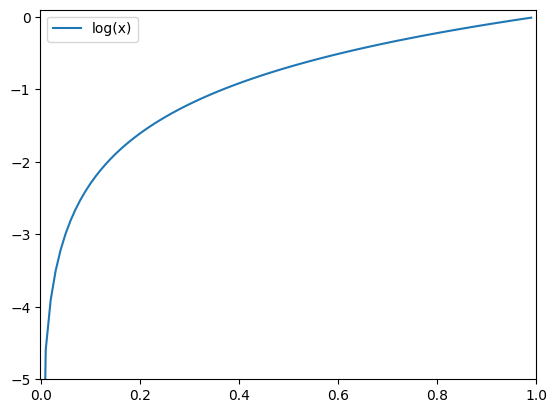

In [56]:
import matplotlib.pyplot as plt

x = np.arange(0.0001, 1.0, 0.01)
y = np.log(x)
plt.plot(x, y, label="log(x)")
plt.ylim(-5.0, 0.1)
plt.xlim(-0.001, 1.0001)
plt.legend()
plt.show()

In [57]:
# 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))   # log 0 을 막기 위한 delta

In [58]:
# Ex)
# 정답 레이블: 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# '7'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


* 위의 SSE와 CEE의 경우는 데이터 하나에 대한 손실함수 -> 100개가 있으면 100개의 손실 함수 값을 지표로 삼아야 함.
* -> 손실 함수의 합(정규화): 평균 손실 함수  
$E = -\frac{1}{N} \sum_n \ \sum_k t_k \ log \ y_k$   

**미니배치 학습**   
훈련 데이터가 많을 경우 일일이 손실 함수를 계산하는 것은 힘들다.   
-> 훈련 데이터로부터 일부만 골라 학습 = **미니배치 학습**

In [59]:
# 미니배치를 적용한 MNIST
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

# 무작위 10장만 추출 = 미니배치
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape)

(60000, 784)
(60000, 10)
(10, 784)


In [60]:
# 배치용 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size   # one-hot encoding
    # return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

**왜 정확도라는 지표를 놔두고 손실 함수의 값을 사용하는가?**   

* 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실함수의 값을 가능한 한 작게 하는 매개변수의 값을 찾는다.
* 이때 매개변수의 미분을 계산하고 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복
    * 미분 값이 음인 경우 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄여나감. (반대의 경우에도 동일)
* 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 된다. (계단 함수와 시그모이드 함수의 차이를 생각 하면 됨)

##### 4.3 수치 미분   
**미분**:   $\frac {df(X)}{dx} = \lim_{h \to 0} \frac {f(x+h)-f(x)}{h}$

In [61]:
# 미분 구현 (나쁜 예)
def numerical_diff(f, x):
    h = 10e-50                      # 문제점1: 반올림 오차 문제, 소수점 8자리 이하 생략 -> 0
    return (f(x+h) - f(x)) / h      # 문제점2: 차분, h를 무한히 0으로 좁히는 것이 불가능 -> 중심 차분(중앙 차분)

# 개선
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)    # 수치 미분: 아주 작은 차분으로 미분

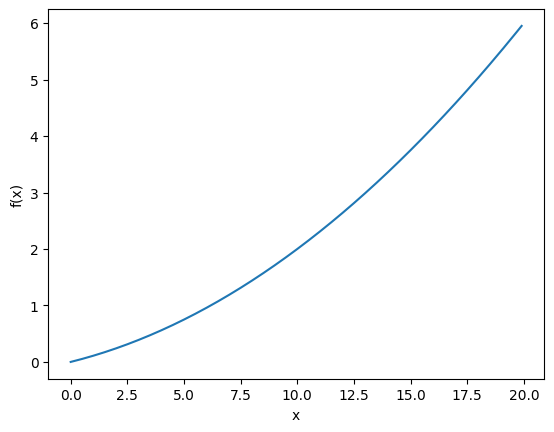

0.1999999999990898
0.2999999999986347


In [62]:
# 수치 미분의 예: y = 0.01x^2 + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

print(numerical_diff(function_1, 5)) 
print(numerical_diff(function_1, 10))


5 와 10에 대한 해석적 해는 $\frac {df(x)}{dx} = 0.02x \ + \ 0.1$ 에 각 5, 10을 대입하여 0.2, 0.3이다.   
구현한 수치 미분과 비교하였을때 아주 작은 오차가 있음을 알 수 있다.

0.1999999999990898


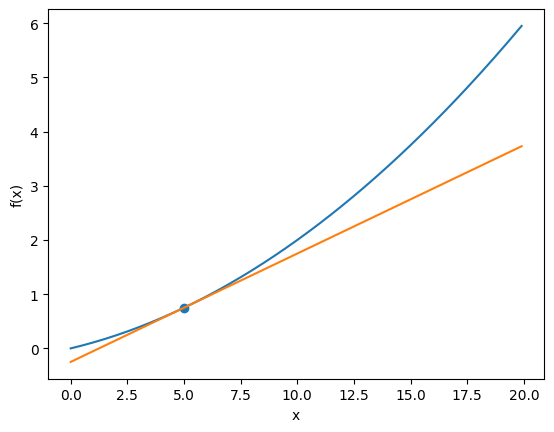

In [63]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.scatter(5, function_1(5))
plt.show()

**편미분**   
예시 함수: $f(x_0, x_1) = x_0^2 + x_1^2$   
예시 함수와 같이 변수가 여럿인 함수에 대한 미분을 **편미분**이라 한다.   
편미분의 경우, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정하여 수치 미분 함수를 적용하여 푼다.

In [64]:
def function_2(x):
    return x[0]**2 + x[1]**2

##### 4.4 기울기
   
$x_0$과 $x_1$의 편미분을 동시에 계산하고 싶다면? (모든 변수의 편미분을 벡터로 정리한 것을 **기울기** 라고 한다.)

In [65]:
# 기울기 구현
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [66]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


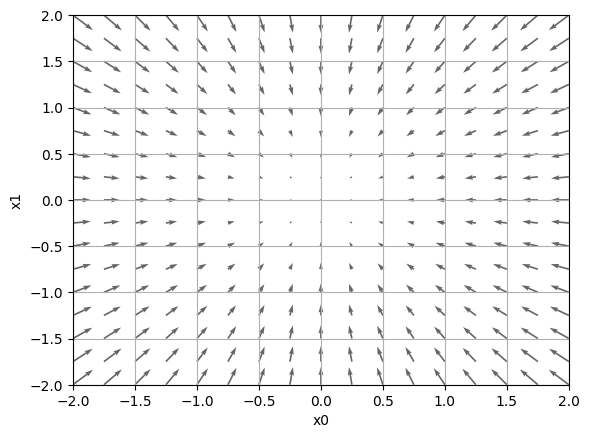

In [67]:
# 예시 함수의 기울기
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

기울기가 가리키는 쪽은 각 장소에서의 함수의 출력 값을 가장 크게 줄이는 방향이다.

**경사법(경사하강법)**   
: 손실 함수의 최솟값을 기울기를 사용하여 찾는 방법   
(기울어진 방향이 곡 최솟값을 가리키는 것은 아니나 그 방향으로 가야 함수의 값을 줄일 수 있다.)   
   
$ x_0 = x_0 - \eta \frac {\partial f} {\partial x_0}  $ 
   
     
$ x_1= x_1 - \eta \frac {\partial f} {\partial x_1}  $ &nbsp;&nbsp;&nbsp;&nbsp;   ($\eta$는 학습률)

In [83]:
# 경사하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x) # 기울기
        x -= lr * grad  # 기울기 방향으로 학습률만큼 이동
        
    return x

In [82]:
# 예제
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])  # 초기값
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


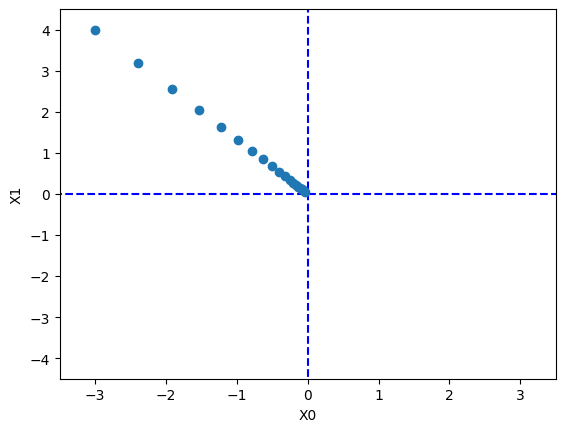

In [70]:
# 예시 함수에서 경사법을 사용한 갱신과정
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [84]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [72]:
# 신경망 기울기 구하기 예
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss


In [73]:
net = simpleNet()
print(net.W)    # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[[ 0.18042822  0.26566422  2.22195847]
 [-1.09234818  0.84841341  1.3746478 ]]
[-0.87485643  0.9229706   2.5703581 ]
2


In [74]:
t = np.array([0, 0, 0])
t[np.argmax(p)] = 1
net.loss(x, t)

0.2024918146866301

In [75]:
# 기울기 구하기
def f(W):
    return net.loss(x, t)
# f = lambda W: net.loss(x, t)

dW = numerical_gradient(f, net.W)   # 가중치(w)를 h만큼 더한 경우와 h만큼 뺀 경우의 차분
print(dW)

[[ 0.01563048  0.09435366 -0.10998415]
 [ 0.02344573  0.14153049 -0.16497622]]


##### 4.5 학습 알고리즘 구현하기

**확률적 경사 하강법(stochastic gradient descet, SGD)**   

* 전제: 신경망에서 학습은 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 일컫는다.
* 1단계 - 미니배치: 훈련 데이터 중 일부를 무작위로 가져옴, 미니배치의 손실 함수 값을 줄이는 것을 목표
* 2단계 - 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함.
* 3단계 - 매개변수 갱신: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
* 4단계 - 반복: 1-3단계 반복

In [76]:
# 2층 신경망 클래스 구현
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params={}  # 신경망의 매개변수를 보관
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):   # x: 입력 데이터, t: 정답 레이블
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}  # 매개변수의 기울기 보관
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # Chapter 5
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [77]:
# Ex)
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [85]:
# 미니배치 학습 구현
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼 파라미터
iters_num = 10000  # 반복 횟수: 대략 1회에 30초, 10회에 5분, 100회에 50분, 1000회에 500분, 10000회에 5000분(3일 11시간...)
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch) # 속도가 느려서 아래 코드를 실행해서 출력
    # grad = network.gradient(x_batch, t_batch)     # Chapter 5
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

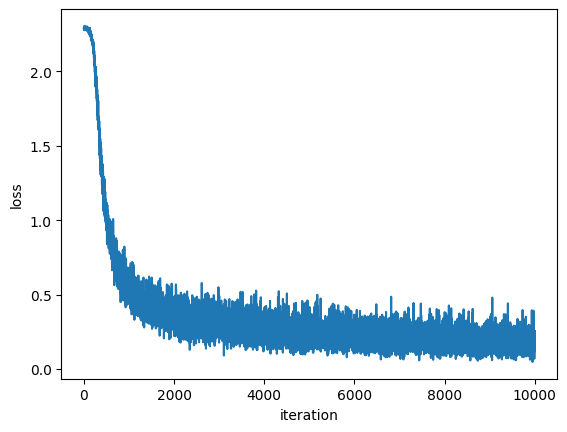

In [93]:
plt.plot(train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [99]:
# 시험 데이터 평가하기
# 오버피팅 평가: 학습 도중 정기적으로 훈련데이터와 시험 데이터를 대상으로 정확도를 기록
# 1 에폭(epoch)은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수
# 10,000개의 데이터를 100개로 미니배치 학습할 경우 100회시 훈련 데이터 모두 소진 -> 100회 = 1에폭
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

# 하이퍼 파라미터
iters_num = 10000 
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)     # Chapter 5
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(str(i/iter_per_epoch + 1) + " epoch: " + "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

1.0 epoch: train acc, test acc | 0.09871666666666666, 0.098
2.0 epoch: train acc, test acc | 0.7860166666666667, 0.7901
3.0 epoch: train acc, test acc | 0.8777666666666667, 0.883
4.0 epoch: train acc, test acc | 0.8987333333333334, 0.9009
5.0 epoch: train acc, test acc | 0.9073666666666667, 0.9111
6.0 epoch: train acc, test acc | 0.9133333333333333, 0.9148
7.0 epoch: train acc, test acc | 0.9185666666666666, 0.9222
8.0 epoch: train acc, test acc | 0.9226833333333333, 0.9243
9.0 epoch: train acc, test acc | 0.9261833333333334, 0.9273
10.0 epoch: train acc, test acc | 0.9301666666666667, 0.9303
11.0 epoch: train acc, test acc | 0.9329, 0.9323
12.0 epoch: train acc, test acc | 0.9359, 0.9357
13.0 epoch: train acc, test acc | 0.9388333333333333, 0.9373
14.0 epoch: train acc, test acc | 0.9406, 0.9405
15.0 epoch: train acc, test acc | 0.9425166666666667, 0.9417
16.0 epoch: train acc, test acc | 0.9445666666666667, 0.9432
17.0 epoch: train acc, test acc | 0.9458833333333333, 0.9444


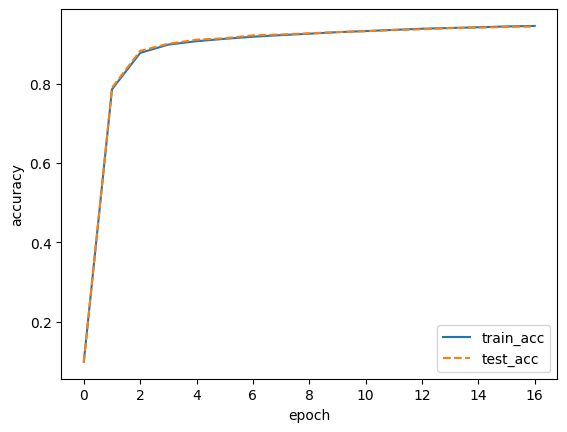

In [100]:
plt.plot(train_acc_list, label="train_acc")
plt.plot(test_acc_list, linestyle="--", label="test_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

##### 4.6 정리